# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0


df = pd.DataFrame({'p1': p1, 'p2': p2})


In [89]:
def transf_lin(Transform_matrix):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    ymin = xmin = -15
    ymax = xmax = 15
    
    
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    transformed_data = np.matmul(Transform_matrix, df[['p1','p2']].to_numpy().transpose())
    
    lista_xticks = list(range(int(xmin), int(xmax)))
    ticksx = ax.set_xticks(lista_xticks)
    labels = ax.set_xticklabels(lista_xticks, fontsize='large')
    
    lista_yticks = list(range(int(ymin), int(ymax)))
    ticksy = ax.set_yticks(lista_yticks)
    labels = ax.set_yticklabels(lista_yticks, fontsize='large')
    
    ax.arrow(0,0, Transform_matrix[0,0], Transform_matrix[0,1])
    ax.arrow(0,0, Transform_matrix[1,0], Transform_matrix[1,1])
    
    ax.axvline(0, linewidth=.5, linestyle = '--')
    ax.axhline(0, linewidth=.5, linestyle = '--')

    #Plotando os gráficos originais:
    
    plt.scatter(df['p1'], df['p2'], label = 'originais')

    #Plotando os valores transformados:
    plt.scatter(transformed_data[0,:], transformed_data[1,:], label= 'transformados')

    plt.legend(loc='lower right')

    transformed_data = pd.DataFrame(transformed_data)
    df['media'] = transformed_data.iloc[:0]
    df['evoluçao'] = transformed_data.iloc[:1]
    
    return df

[[ 7.45405986  3.98046502  1.62147187  4.99375359  8.06654581  3.83203323
   9.8224836   7.38295537  5.25467221  4.79861827  4.17960223  7.82519341
   3.99936809  0.9942103   4.13757855  6.71682133  2.53356683  2.15813583
   5.33825878  5.20172984  5.74485901  8.59407998  7.47877281  5.69465761
   7.80553585  2.68098762  2.55633638  2.80249585  2.73545744  6.24674645
   0.50229104  3.53403035  4.93624632  4.59241648  5.08877915  3.52626632
   4.106134    8.39094043  9.07536919  4.41210519  7.2830862   1.23840457
   3.74795759  3.5145861   8.75360914  3.09348462  4.66283726  9.92779893
   4.65256724  5.44720949]
 [ 0.97873601  2.23814334 -1.29408532 -1.03878821  1.74371223 -0.79806274
   0.02968323  1.06931597  0.89070639  1.75488618  1.49564414  1.06939267
  -0.77270871  0.79486267  0.31427199 -1.32626546  1.41729905  0.80723653
   0.04549008 -0.23309206 -1.19830114  0.19952407  0.46843912 -0.83115498
   1.16220405 -1.09720305 -2.12310035  1.03972709 -0.40336604 -0.12602959
  -0.837516

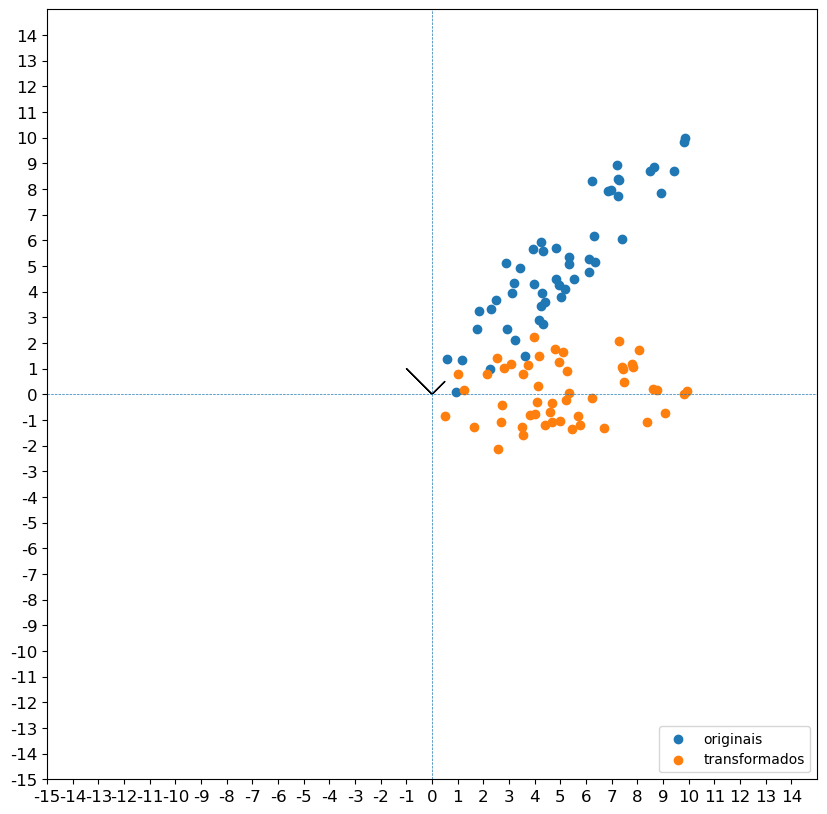

In [93]:
Transform_matrix = np.array([[0.5,0.5],
                             [-1,1]])

transf_df = transf_lin(Transform_matrix)

In [103]:
df.corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [119]:
transf_df = transf_df.T
transf_df.corr()

,0,1
0,1.000000,0.133474
1,0.133474,1.000000


### Podemos ver que a transformação faz com que os a correlação entre os dois dados se torne muito menor. Em algoritmos onde alta correlação entre os dados não é algo benéfico, uma transformação desse tipo poderia ser usada para diminuir a correlação, sem, no entanto, perder informações por excluir uma das duas métricas...

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

### Para aplicar uma soma e diferença, podemos utilizar a mesma função que anteriormente, porém passando outra matrix como parâmetro. Vejamos:

[[14.90811972  7.96093004  3.24294375  9.98750717 16.13309162  7.66406647
  19.6449672  14.76591074 10.50934442  9.59723655  8.35920446 15.65038682
   7.99873618  1.9884206   8.2751571  13.43364265  5.06713366  4.31627166
  10.67651756 10.40345968 11.48971803 17.18815996 14.95754562 11.38931523
  15.6110717   5.36197523  5.11267276  5.60499171  5.47091489 12.49349289
   1.00458208  7.06806069  9.87249264  9.18483297 10.17755829  7.05253265
   8.21226799 16.78188086 18.15073838  8.82421039 14.5661724   2.47680913
   7.49591518  7.02917219 17.50721829  6.18696925  9.32567452 19.85559786
   9.30513447 10.89441897]
 [-0.97873601 -2.23814334  1.29408532  1.03878821 -1.74371223  0.79806274
  -0.02968323 -1.06931597 -0.89070639 -1.75488618 -1.49564414 -1.06939267
   0.77270871 -0.79486267 -0.31427199  1.32626546 -1.41729905 -0.80723653
  -0.04549008  0.23309206  1.19830114 -0.19952407 -0.46843912  0.83115498
  -1.16220405  1.09720305  2.12310035 -1.03972709  0.40336604  0.12602959
   0.837516

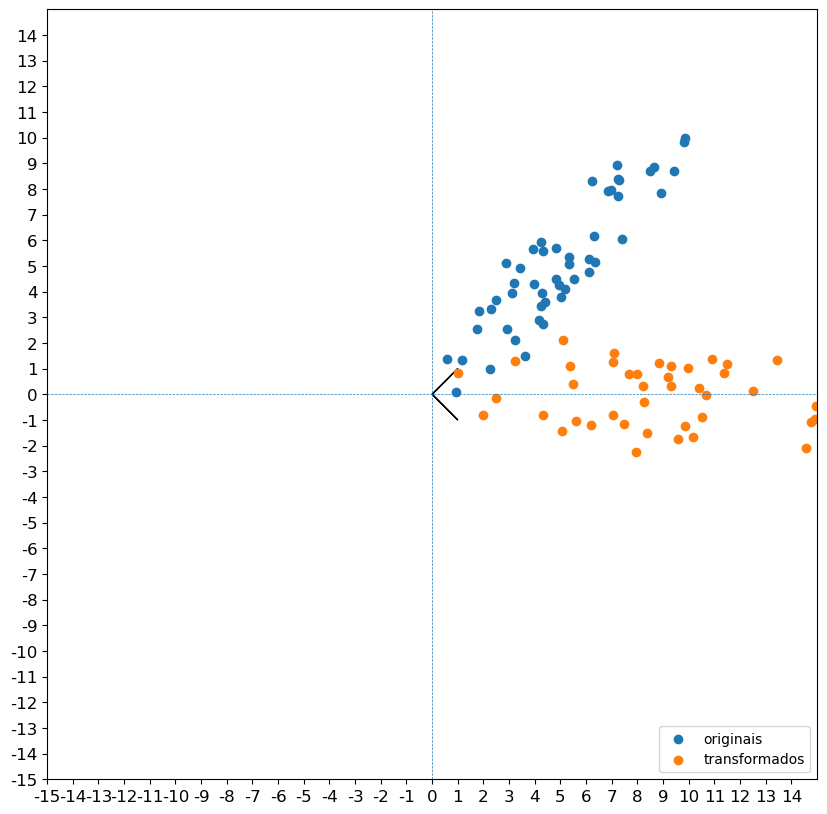

In [125]:
Transform_matrix2 = np.array([[1,1],
                             [1,-1]])

transf_df2 = transf_lin(Transform_matrix2)


### A maior diferença entre os dois gráficos é a que já era esperada: o eixo x das duas imagens são uma dilatação um do outro, visto que em cima utilizamos 0.5 e aqui utilizamos 1 nas duas primeiras linhas da matrix. A outra diferença, mais suscinta, é que o algoritmo da diferença tem um espelhamento com relação ao eixo x quando se trata dos valores de y, já que os valores de y que antes eram p1-p2 passaram a ser p2-p1, e dado que 